LINEAR REGRESSION 

voy a hacer un ensayo de regresión lineal simple y después una múltiple 

Paso 1. Lectura del conjunto de datos procesado

In [1]:
import pandas as pd

train_data = pd.read_csv("/workspaces/joseVentlinearreg/data/processed/clean_medical_train.csv")
test_data = pd.read_csv("/workspaces/joseVentlinearreg/data/processed/clean_medical_test.csv")

train_data.head()

,smoker_n,age,bmi,charges
0,1.0,0.108696,0.230024,2396.09590
1,1.0,0.065217,0.263250,3279.86855
2,1.0,0.739130,0.580172,33471.97189
3,1.0,0.978261,0.686306,13405.39030
4,1.0,0.630435,0.286252,9715.84100


In [2]:
train_data.columns

Index(['smoker_n', 'age', 'bmi', 'charges'], dtype='object')

vamos a ver relacion entre variable predictora ( smoker_n) y la objetivo y_n. 
He desacartado smoker_n porque tiene relación inversa y no directa, escojo age. 

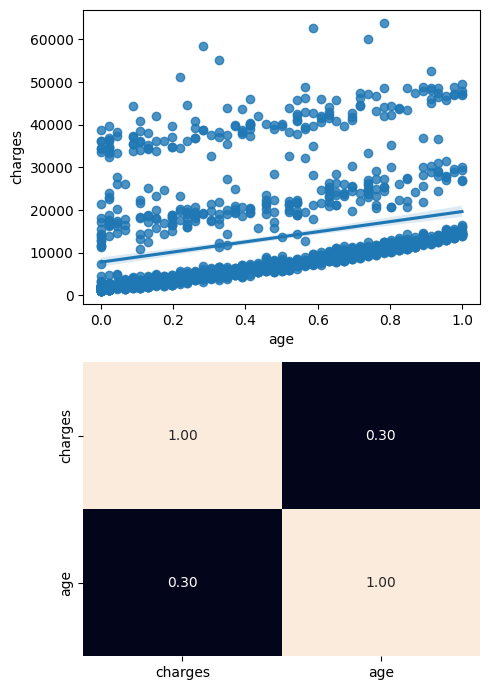

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (5, 7))
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

algo de relación, lo único que hay 

voy a quitar todas las columnas menos age, a ver el experimento 

In [5]:
X_train = train_data.drop(["charges", "bmi", "smoker_n"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges","bmi","smoker_n"], axis = 1)
y_test = test_data["charges"]

Paso 2: Inicialización y entrenamiento del modelo

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 7894.738467293115
Coeficientes (b): [11143.87498746]


paso tres: predicción del modelo 

In [8]:
y_pred = model.predict(X_test)
y_pred

array([15404.74117623, 10559.57813821, 15889.25748003, 11044.09444201,
       11044.09444201, 15404.74117623,  9106.0292268 ,  8863.7710749 ,
       13951.19226482, 15404.74117623, 18311.83899905, 16131.51563193,
       11286.35259391, 18311.83899905, 12013.12704961, 14435.70856863,
        8379.2547711 , 12255.38520152,  9832.8036825 , 10559.57813821,
        8379.2547711 , 12255.38520152, 15404.74117623, 12982.15965722,
       11528.61074581,  8621.512923  , 13708.93411292, 18069.58084714,
       15404.74117623, 15162.48302433, 11044.09444201, 15646.99932813,
        7894.73846729, 17827.32269524, 16616.03193574, 15889.25748003,
        8136.99661919, 10801.83629011, 16373.77378384, 14677.96672053,
        8863.7710749 , 13951.19226482, 13951.19226482, 15889.25748003,
       14677.96672053, 10317.31998631,  7894.73846729, 13951.19226482,
       10317.31998631, 12982.15965722, 10317.31998631, 12982.15965722,
       13951.19226482,  8379.2547711 , 13708.93411292, 14193.45041672,
      

hacemos plot comparativo 

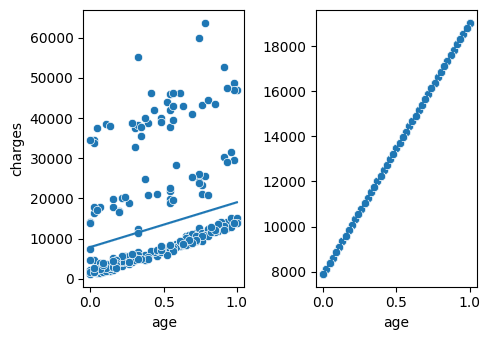

In [9]:
fig, axis = plt.subplots(1, 2, figsize = (5, 3.5))
total_data = pd.concat([train_data, test_data])

# Utilizamos los parámetros ajustados en el entrenamiento para dibujar la línea de regresión en los plots
regression_equation = lambda x: 7894.738467293115 + 11143.87498746 * x

sns.scatterplot(ax = axis[0], data = test_data, x = "age", y = "charges")
sns.lineplot(ax = axis[0], x = test_data["age"], y = regression_equation(test_data["age"]))
sns.scatterplot(ax = axis[1], x = test_data["age"], y = y_pred)
sns.lineplot(ax = axis[1], x = test_data["age"], y = regression_equation(test_data["age"])).set(ylabel = None)

plt.tight_layout()

plt.show()

Para calcular la efectividad del modelo utilizaremos el error cuadrático medio (MSE) y el coeficiente de determinación (R2
), unas de las métricas más populares:

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 166275348.23176482
Coeficiente de determinación: 0.09513000782072023


fatal...solo el 9% de los datos están explicados por el modelo 

paso 4: optimización de resultados por grid search 

In [11]:
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros a mano que queremos ajustar
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [12]:
grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

ValueError: Invalid parameter 'C' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Supongamos que tienes tus datos en X_train, y_train, X_test, y_test.

# Definir el modelo de regresión lineal
model = LinearRegression()

# Definir los hiperparámetros a probar (en este caso, no hay hiperparámetros)
param_grid = {}

# Crear el objeto GridSearchCV
grid = GridSearchCV(model, param_grid, cv=5)

# Ajustar el modelo utilizando GridSearchCV
grid.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
print(f"Mejores hiperparámetros: {grid.best_params_}")

# Obtener el mejor modelo
best_model = grid.best_estimator_

# Evaluar el modelo en el conjunto de prueba
test_score = best_model.score(X_test, y_test)
print(f"Puntuación en el conjunto de prueba: {test_score}")


Mejores hiperparámetros: {}
Puntuación en el conjunto de prueba: 0.09513000782072023
